In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Basics

1) Consider the problem of classifying 4 dimension features(unpadded).

Draw a network(on paper or something) of a neural network of 4 hidden layer where the first two hidden layers has 2 nodes each and last two has 3 nodes each.

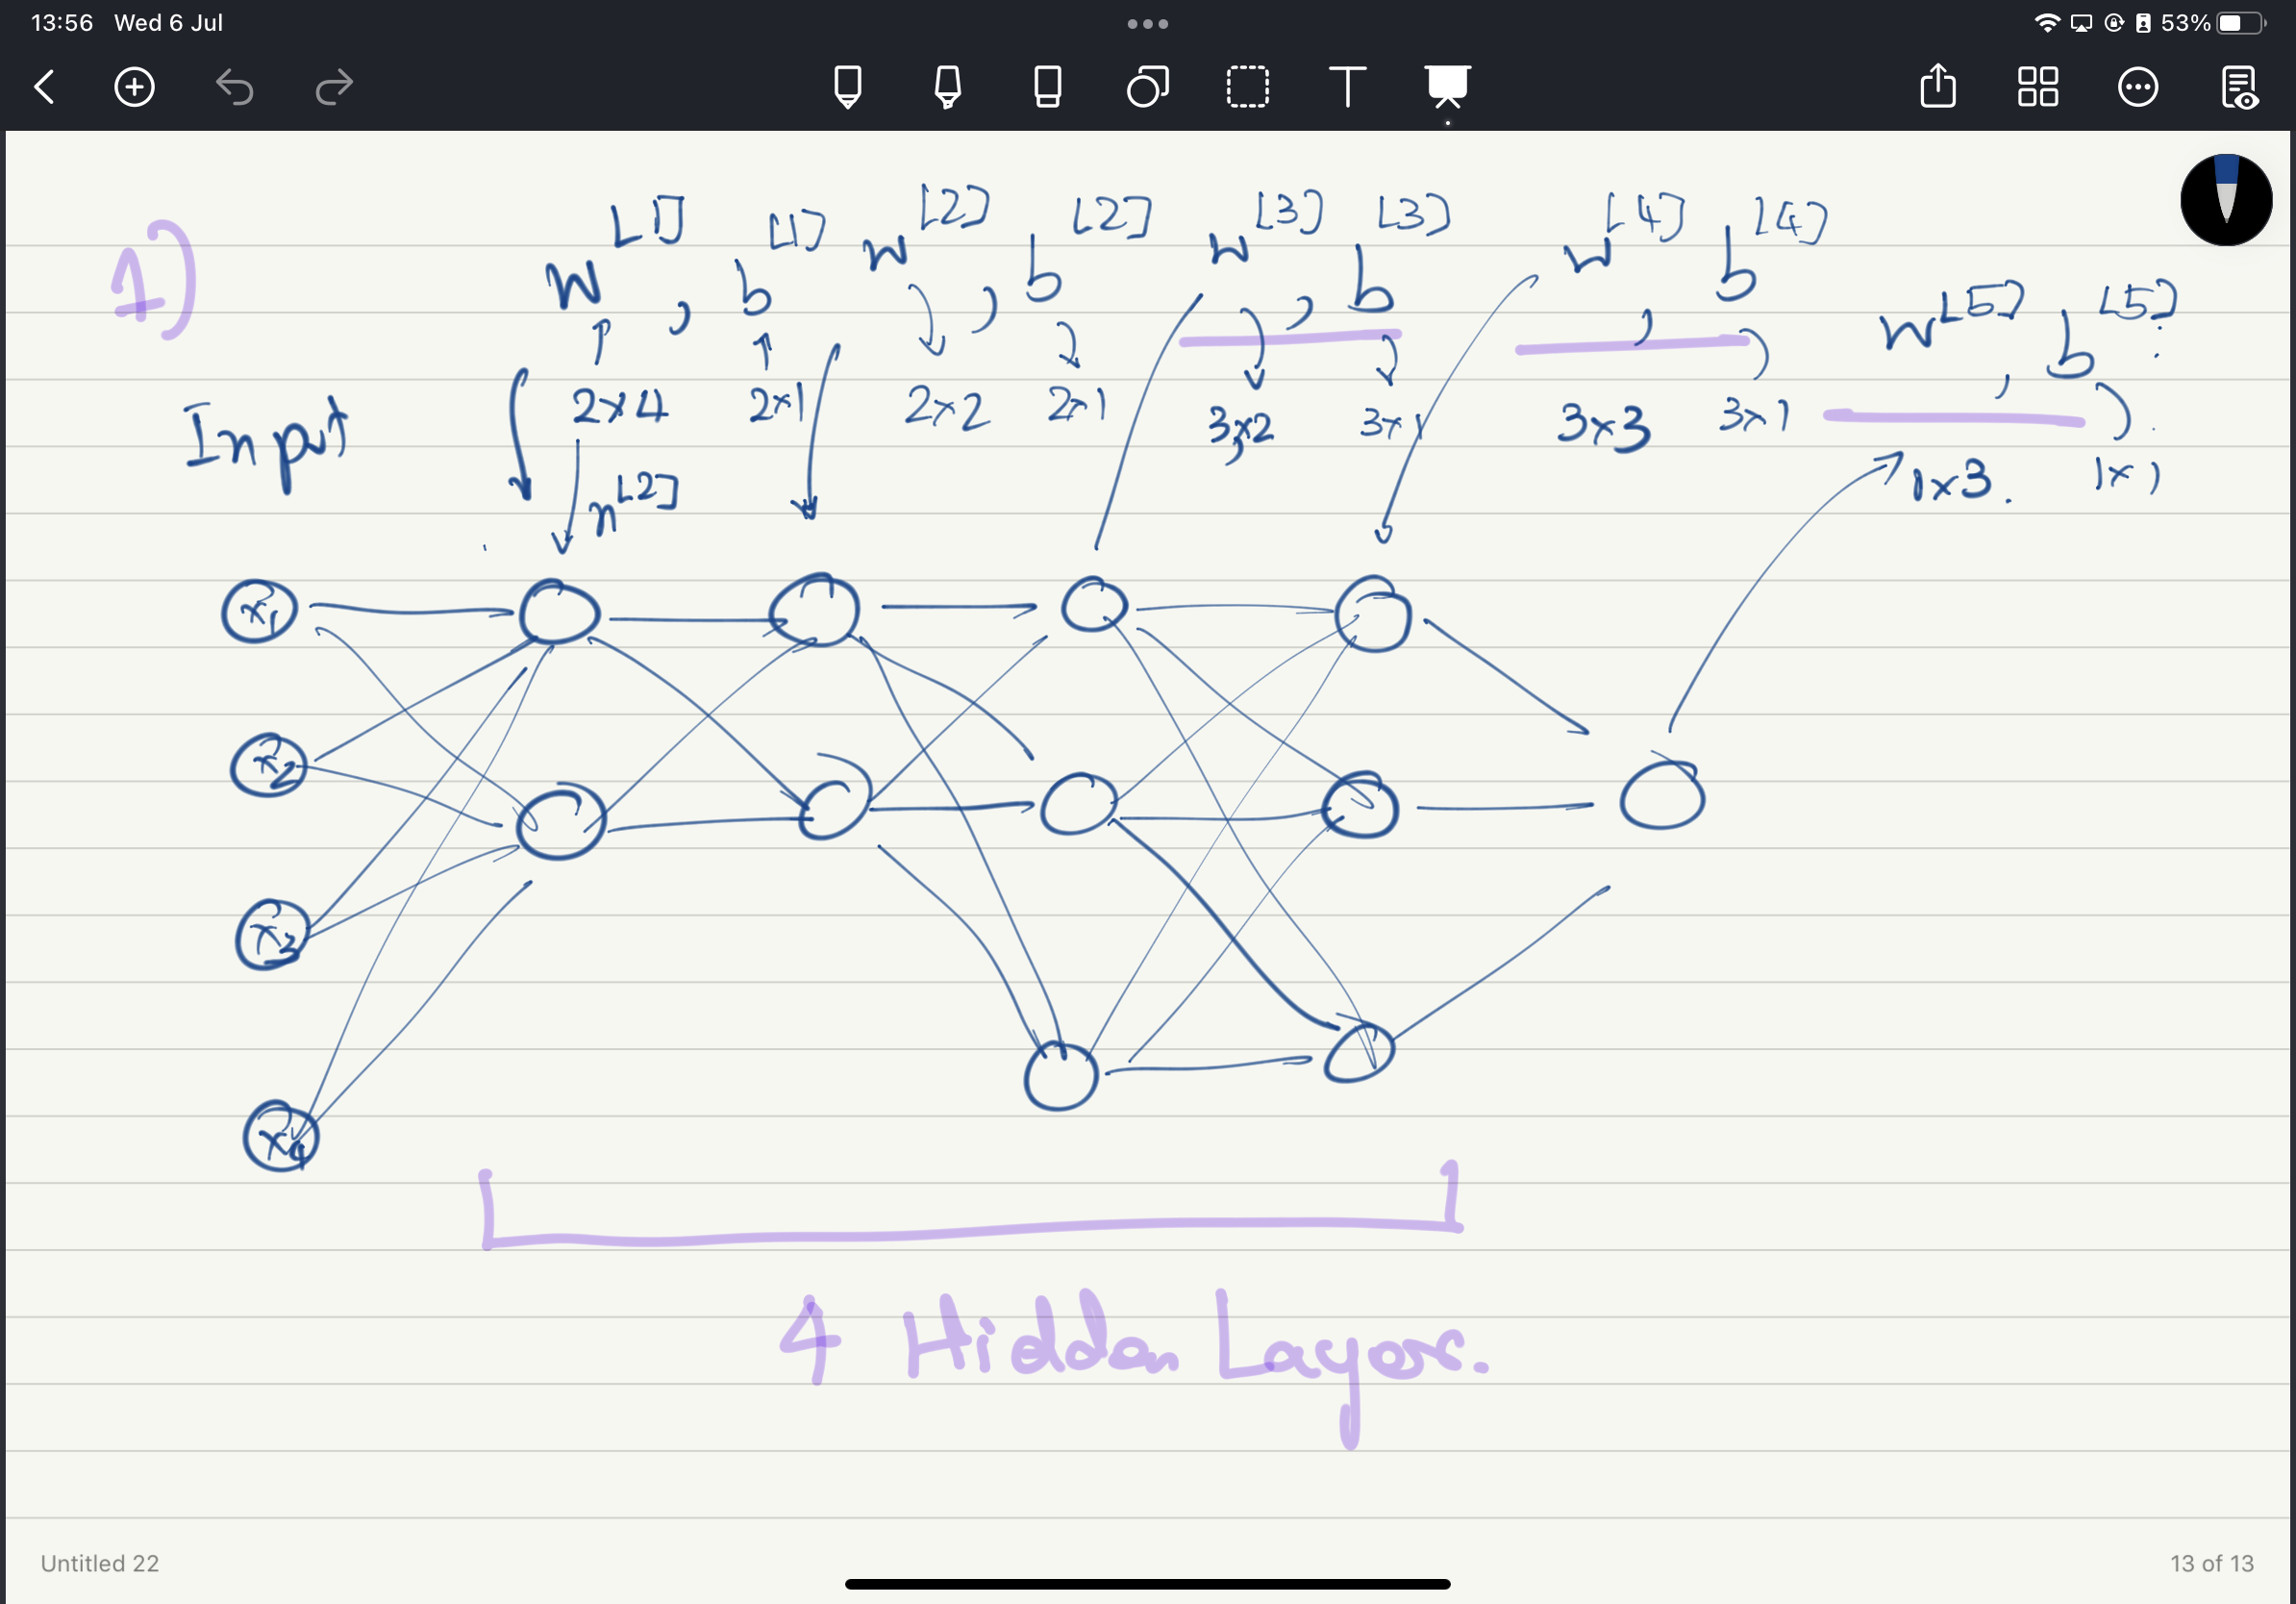

2) What is the dimension for all the $W$ adn $b$?

3) Consider 
$$
    W^{[1]} = \begin{bmatrix}
        4 & 1 \\
        -3 & 3 \\
        2 & 3
    \end{bmatrix}
$$

$$
    b^{[1]} = \begin{bmatrix}
       1 \\
       2 \\
       -3 \\
    \end{bmatrix}
$$

and 

$$ W^{[2]} = \begin{bmatrix}
2 & 3 & 4
\end{bmatrix}
$$

$$
    b^{2} = \begin{bmatrix}
-2
\end{bmatrix}
$$

What does your network look like?

4) What is the probability of $x = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ to be of class 1.

In [7]:
w1 = np.array([
    [4, 1.],
    [-3, 3],
    [2, 3]
])

b1 = np.array([
    [1],
    [2],
    [3]
])


w2 = np.array([[2,3,4.]])

b2 = np.array([[-2]])
print(w2, b2)

x = np.array([
    [1],
    [2]
])

[[2. 3. 4.]] [[-2]]


In [13]:
z1 = w1 @ x + b1
print(z1)

from scipy.special import expit

a1 = expit(z1)
print(a1)

[[ 7.]
 [ 5.]
 [11.]]
[[0.99908895]
 [0.99330715]
 [0.9999833 ]]


5) Given two dimension feature find the weights for the network that returns 1 if $2x_1 + x_2 - 1 > 0$ AND $x_1 - x_2 - 1 > 0$

In [16]:
z2 = w2 @ a1 + b2
print(z2)
print(expit(z2))

[[6.97803254]]
[[0.99906873]]


# Training

1) What's our cost function?

2) Consider the following dataset. 

We want to train a neural network 2 hidden layers where the first one has 4 nodes and second one with 2 nodes. How many parameters do we need in total?

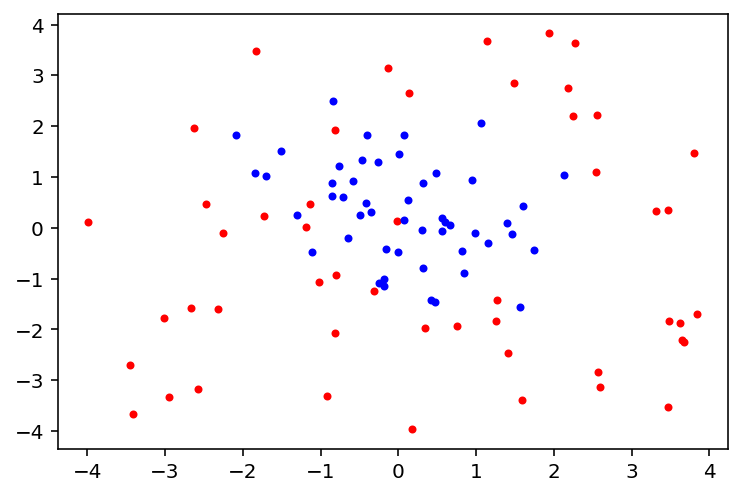

In [40]:
np.random.seed(999)
xs = np.hstack([np.random.randn(2,50), np.random.random(size=(2,50))*8-4])
ys = np.array([1]*50+[0]*50)

def draw_data():
    plt.plot(xs[0, ys==0], xs[1, ys==0], '.r')
    plt.plot(xs[0, ys==1], xs[1, ys==1], '.b')
    
draw_data()

3) Is initializing your initial weight with all 0 or all the same number a good idea?

In [41]:
xs

array([[ 1.27157844e-01,  1.40189088e+00,  3.14814987e-01,
        -8.58449164e-01, -2.66134437e-01, -6.48900710e-01,
         1.56626757e+00, -2.09137019e+00,  1.45632806e+00,
         9.45293415e-01, -4.00201194e-01,  3.15227304e-01,
        -1.11006083e+00, -5.84821525e-01, -1.88409564e-01,
         8.13023649e-01, -1.61304716e-01,  1.60087155e+00,
         9.84342575e-01, -8.35447373e-01, -1.86649340e-01,
        -8.58067074e-01, -7.59778159e-01, -1.51205424e+00,
         1.74777474e+00,  2.13005498e+00,  7.11542235e-02,
        -1.84164224e+00, -3.52590698e-01, -4.08903795e-01,
         5.59310171e-01,  4.74013097e-01, -1.70263337e+00,
        -1.30828655e+00,  4.24831738e-01,  6.66868345e-03,
        -4.70683277e-01,  4.80522162e-01,  1.06618630e+00,
         1.15631841e+00, -2.40975167e-03,  6.92448453e-02,
         8.47024068e-01,  6.61684352e-01, -7.08233760e-01,
        -4.98605435e-01,  6.04875725e-01,  3.00543132e-01,
        -2.51228669e-01,  5.56110081e-01, -1.35157741e-0

4) Given the following size information. Complete the following function.

In [34]:
from dataclasses import dataclass

n_nodes = [2, 4, 2, 1] # number of node in each layer

@dataclass
class Offsets:
    w_offset: int
    n_w: int
    b_offset: int
    n_b: int

def total_params(n_nodes):
    n_params = [(n_nodes[i-1]+1)*n_nodes[i] for i in range(1, len(n_nodes))]
    return sum(n_params)
        
def compute_w_b_offset(n_nodes, layer_no):
    n_params = [(n_nodes[i-1]+1)*n_nodes[i] for i in range(1, len(n_nodes))]
    offsets = np.cumsum([0] + n_params)
    w_offset = offsets[layer_no-1]
    n_w = n_nodes[layer_no]*n_nodes[layer_no-1]
    b_offset = w_offset + n_w
    n_b = n_nodes[layer_no]
    return Offsets(
        w_offset = w_offset,
        n_w = n_w,
        b_offset = b_offset,
        n_b = n_b
    )

print(n_nodes)

compute_w_b_offset(n_nodes, 2)

[2, 4, 2, 1]


Offsets(w_offset=12, n_w=8, b_offset=20, n_b=2)

4) What implement the vectorized version of our cost function.

5) Use np.optimize.minimize to train your network. Check with contour plot.

In [66]:
from scipy.optimize import minimize
class SadNeuralNetwork:
    def __init__(self, n_nodes):
        self.n_nodes = n_nodes
        n = total_params(self.n_nodes)
        self.v = None
    
    def train(self, xs, ys):
        def cost(v):
            s = SadNeuralNetwork(self.n_nodes)
            s.v = v
            guess = s.classify(xs)[0]
            #ret = sum((ys - guess)**2)
            ret = -sum(ys*np.log(guess) + (1-ys)*np.log(1-guess))
            print(ret)
            return ret
        result = minimize(cost, np.random.random(total_params(self.n_nodes)))
        self.v = result.x
            
    def classify(self, xs):
        a = xs
        for layer_no, (nl, nl_prev) in enumerate(zip(self.n_nodes[1:], self.n_nodes[:-1]), start=1):
            o = compute_w_b_offset(self.n_nodes, layer_no)
            w = self.v[o.w_offset: o.w_offset+o.n_w]
            b = self.v[o.b_offset: o.b_offset+o.n_b]
            w = w.reshape(nl, nl_prev)
            b = b.reshape(nl, 1)
            #print(w.shape, b.shape)
            z = w @ a + b
            a = expit(z)
        return a
    
s = SadNeuralNetwork([2, 4, 2, 1])
s.v = np.random.random(25)
s.train(xs, ys)

106.06228746384394
106.06228745823533
106.06228744661743
106.06228747155735
106.06228744781532
106.06228746150369
106.06228745319025
106.06228746504345
106.06228745765137
106.06228747390286
106.06228747405542
106.06228747298468
106.06228746804318
106.06228749049568
106.06228747691938
106.06228747695766
106.06228748012738
106.06228751542545
106.06228749114493
106.06228748973764
106.06228749754057
106.06228750626035
106.06228754407803
106.0622879295245
106.06228789860658
106.06228800750792
106.06228746384394
69.79554393818199
69.79554393818199
69.79554393760023
69.79554393589447
69.79554394065752
69.79554393345458
69.79554393772605
69.79554393541062
69.7955439384356
69.79554393713478
69.79554393877068
69.79554393749895
69.79554393806791
69.79554393812334
69.79554393910077
69.79554393812424
69.79554393806454
69.79554393861036
69.79554394310283
69.79554393835306
69.79554393754252
69.79554394116606
69.79554394018112
69.7955439483704
69.7955440175974
69.79554400758991
69.79554404310649
68.67

41.65347692110566
41.65347694726531
41.65347692452159
41.65347692108891
41.65347692113922
41.6534769209298
41.653476921059344
41.653476929650594
41.653476916135716
41.653476947795134
41.65347692108257
41.65347692117029
41.65347691492642
41.65347691998522
41.653476888359265
41.65347688839983
41.65347691744362
41.653476817171274
41.653476812967426
41.65347681297713
41.65347681283268
41.65347688857093
41.65347681296468
41.65347680108055
41.65347679154322
41.65347678339632
40.22874748543336
40.22874748543336
40.22874751931337
40.22874748539572
40.228747485418246
40.228747485461156
40.228747485285055
40.228747485389235
40.22874749542044
40.22874748713764
40.2287475076658
40.228747485414466
40.22874748549061
40.22874747263351
40.22874748388535
40.228747443456136
40.22874744349361
40.22874748028477
40.228747388049065
40.228747384216895
40.228747384226295
40.228747384037
40.22874744364482
40.228747384214515
40.22874737594078
40.22874736201832
40.22874735448231
37.188231959029864
37.18823195902

24.074747718437706
24.07474771530777
24.074747714988654
24.074747717303705
24.07474771964938
24.07474772026224
24.074747720247686
24.07474772006393
24.074747714988746
24.07474772024717
24.074747718151308
24.074747717840534
24.074747717936848
24.04269514520076
24.04269514520076
24.04269514067688
24.04269514379823
24.04269514479738
24.042695145928537
24.04269514519125
24.042695145211177
24.042695145410786
24.042695146943164
24.04269514413905
24.042695144678934
24.0426951451939
24.042695142657223
24.042695145784126
24.04269514319165
24.04269514294975
24.042695144755466
24.042695145031814
24.042695145532072
24.042695145518504
24.04269514530222
24.042695142949732
24.042695145518067
24.042695145953576
24.042695145801236
24.042695145769983
23.998054262829733
23.998054262829733
23.99805426787852
23.99805426558605
23.99805426244193
23.998054263457032
23.99805426282291
23.99805426283757
23.99805426328917
23.99805426281199
23.99805426613891
23.998054262387647
23.99805426282461
23.99805426103883
2

23.409113197693284
23.409113196852303
23.409113196853735
23.409113196869967
23.409113197152344
23.40911319791737
23.40911319790986
23.409113196847922
23.409113198249127
23.409113198322707
23.40911319832253
23.409113198322487
23.40911319790986
23.409113198322544
23.409113198643695
23.4091131986636
23.409113198722046
23.393584299755737
23.393584299755737
23.39358429630984
23.393584297849145
23.3935842997198
23.393584299767777
23.39358429975571
23.393584299755666
23.393584299778624
23.393584299700546
23.393584298984337
23.39358429975226
23.393584299755773
23.39358429974871
23.393584300156316
23.39358430114774
23.393584301145985
23.39358429975398
23.393584303785115
23.393584303933213
23.393584303933142
23.393584303933142
23.393584301145985
23.393584303933142
23.393584301932457
23.39358430187807
23.393584302025506
23.35913356913648
23.35913356913648
23.35913355922512
23.359133561845344
23.35913356913509
23.359133569137455
23.35913356913648
23.35913356913648
23.35913356934454
23.359133568907

22.905668149742883
22.905668149780784
22.9056681497683
22.905668149768307
22.905668149776385
22.90566814975139
22.905668149959006
22.9056681497655
22.905668149768307
22.90566814976638
22.905668149843223
22.90566815002157
22.905668150021988
22.905668149768157
22.905668149614577
22.90566814965186
22.90566814958961
22.90566814958992
22.905668150021988
22.90566814958961
22.90566814973682
22.905668149753886
22.905668149751165
22.90560627885305
22.90560627885305
22.905606278780425
22.90560627879172
22.905606278825992
22.905606278865626
22.90560627885305
22.905606278853057
22.905606278864497
22.905606278832977
22.905606278817647
22.90560627885062
22.90560627885305
22.905606278848822
22.905606278850293
22.905606278856304
22.90560627885676
22.90560627885283
22.905606278905957
22.90560627894637
22.905606278884346
22.905606278884665
22.90560627885676
22.905606278884346
22.905606278910803
22.9056062789092
22.90560627891135
22.90558603453148
22.90558603453148
22.905586034512172
22.905586034479676
2

22.89111267848214
22.89111267849222
22.891112678468126
22.891112678330376
22.891112678480994
22.891112678481882
22.891112678476027
22.891112678472012
22.891112678485772
22.891112678485708
22.89111267848169
22.891112678628303
22.891112678634492
22.8911126786307
22.89111267864547
22.891112678485708
22.891112678630698
22.891112678532632
22.89111267852928
22.8911126785331
22.89110464900436
22.89110464900436
22.891104648896146
22.891104648914972
22.89110464900454
22.891104649005435
22.891104649004202
22.891104649004518
22.89110464901222
22.89110464899261
22.891104648950492
22.89110464900339
22.89110464900426
22.891104649000088
22.891104648985426
22.891104648999193
22.89110464899913
22.891104649004113
22.89110464907404
22.89110464907763
22.891104649073643
22.891104649088206
22.89110464899913
22.891104649073643
22.891104649021155
22.89110464901911
22.891104649021198
22.89109236099957
22.89109236099957
22.891092361058014
22.891092361107624
22.891092360999725
22.89109236100054
22.89109236099941

22.88879221638349
22.88879221638349
22.888792216483044
22.888792216539663
22.888792216541965
22.88879221653881
22.888792216547625
22.88879221638349
22.88879221653881
22.88879221641729
22.888792216413695
22.88879221641448
22.888750084421755
22.888750084421755
22.88875008440222
22.88875008463058
22.888750084421762
22.888750084421787
22.888750084421748
22.888750084421762
22.88875008442048
22.88875008442173
22.888750084667475
22.888750084421723
22.88875008442175
22.888750084423084
22.888750084509162
22.888750084535296
22.888750084535296
22.888750084421766
22.888750084403597
22.88875008440376
22.888750084400804
22.888750084409445
22.888750084535296
22.888750084400804
22.888750084392257
22.888750084395408
22.888750084395287
22.88870632736311
22.88870632736311
22.88870632719709
22.88870632763183
22.888706327363114
22.888706327363142
22.888706327363103
22.888706327363114
22.88870632736159
22.888706327363458
22.888706327776056
22.88870632736308
22.888706327363103
22.888706327364552
22.888706327

22.88842218265602
22.888422182638134
22.88842218263029
22.88842218263033
22.888422182655745
22.88842218265832
22.888422182660943
22.888422182658513
22.88842218266407
22.88842218263033
22.888422182658513
22.888422182654445
22.888422182653816
22.888422182653855
22.888422180123374
22.888422180123374
22.88842218011576
22.88842218011009
22.888422180123374
22.888422180123385
22.88842218012337
22.888422180123374
22.888422180124138
22.88842218012094
22.888422180084593
22.88842218012336
22.888422180123374
22.888422180123662
22.88842218010574
22.888422180097827
22.88842218009787
22.88842218012337
22.888422180125914
22.888422180128533
22.88842218012611
22.88842218013168
22.88842218009787
22.88842218012611
22.88842218012202
22.888422180121406
22.88842218012146
22.888422170026214
22.888422170026214
22.888422170018806
22.88842217001274
22.888422170026217
22.888422170026224
22.88842217002621
22.888422170026217
22.888422170026992
22.888422170023784
22.88842216998723
22.888422170026196
22.8884221700262

22.88799319463679
22.88799319459845
22.887993194598828
22.887993194597893
22.887993194599296
22.88799319490064
22.887993194597893
22.887993194699767
22.887993194705345
22.88799319470504
22.887966278276668
22.887966278276668
22.887966278275425
22.887966278271033
22.887966278276668
22.88796627827667
22.887966278276668
22.88796627827667
22.887966278276085
22.887966278277236
22.887966278285216
22.887966278276664
22.887966278276668
22.887966278277048
22.887966278317666
22.887966278327443
22.887966278327443
22.887966278276668
22.88796627824943
22.88796627825043
22.88796627824977
22.88796627825107
22.887966278327443
22.88796627824977
22.887966278304635
22.887966278305864
22.887966278305644
22.887957688085514
22.887957688085514
22.88795768804553
22.887957688084995
22.887957688085514
22.887957688085514
22.887957688085514
22.887957688085514
22.88795768808493
22.887957688086075
22.887957688077808
22.887957688085507
22.887957688085514
22.88795768808592
22.88795768810553
22.887957688109807
22.88795

22.887904966519176
22.887904966519002
22.88790496651935
22.887904966473283
22.887904966519173
22.887904966519173
22.887904966519308
22.887904966499846
22.887904966495466
22.887904966495466
22.887904966519176
22.88790496654684
22.887904966547463
22.88790496654723
22.887904966547996
22.887904966495466
22.88790496654723
22.8879049665171
22.887904966516427
22.88790496651665
22.887904031457023
22.887904031457023
22.887904031405142
22.887904031404428
22.887904031457023
22.887904031457026
22.887904031457023
22.887904031457023
22.887904031456838
22.887904031457207
22.887904031416085
22.887904031457023
22.887904031457023
22.887904031457147
22.88790403144527
22.88790403144301
22.88790403144301
22.887904031457023
22.88790403148532
22.887904031485952
22.8879040314857
22.88790403148645
22.88790403144301
22.8879040314857
22.887904031457968
22.887904031457463
22.887904031457737
22.887903199482096
22.887903199482096
22.887903199412623
22.88790319940506
22.887903199482096
22.887903199482096
22.88790319

22.887869244405366
22.887869244405266
22.88786924440546
22.88786924440489
22.887869244405362
22.887869244405366
22.88786924440543
22.887869244387876
22.887869244384113
22.887869244384113
22.887869244405366
22.8878692443935
22.887869244393602
22.88786924439348
22.887869244393652
22.887869244384113
22.88786924439348
22.88786924439691
22.887869244396594
22.887869244396533
22.887867875482648
22.887867875482648
22.887867875542
22.887867875471667
22.887867875482648
22.88786787548265
22.887867875482648
22.887867875482648
22.887867875482574
22.887867875482726
22.887867875462593
22.887867875482648
22.887867875482648
22.8878678754827
22.88786787545599
22.887867875449885
22.887867875449885
22.887867875482648
22.887867875477543
22.887867875477667
22.887867875477564
22.88786787547773
22.887867875449885
22.887867875477564
22.88786787547405
22.887867875473447
22.887867875473436
22.887869118464128
22.887869118464128
22.88786911842711
22.88786911835364
22.887869118464128
22.887869118464128
22.887869118

22.887865784999896
22.887865784999857
22.88786578501229
22.887865784999878
22.887865784999878
22.887865784999867
22.887865785001054
22.887865785000894
22.887865785000894
22.887865784999878
22.88786578498951
22.88786578498954
22.887865784989465
22.887865784989575
22.887865785000894
22.887865784989465
22.887865784995167
22.887865784995263
22.887865784995213
22.887865755739487
22.887865755739487
22.88786575574998
22.887865755751264
22.887865755739487
22.887865755739487
22.887865755739487
22.887865755739487
22.887865755739508
22.887865755739465
22.887865755745867
22.887865755739487
22.887865755739487
22.887865755739472
22.887865755740215
22.887865755740002
22.887865755740002
22.887865755739487
22.8878657557328
22.88786575573281
22.887865755732737
22.887865755732857
22.887865755740002
22.887865755732737
22.887865755736662
22.887865755736748
22.887865755736687
22.88786572949711
22.88786572949711
22.88786572949521
22.887865729494262
22.88786572949711
22.88786572949711
22.88786572949711
22.887

22.88785707005802
22.88785707005822
22.887857070058217
22.887857070058296
22.8878570700556
22.887857070058217
22.887857070055766
22.88785707005573
22.887857070055787
22.88785709647604
22.88785709647604
22.887857096444105
22.887857096447238
22.88785709647604
22.88785709647604
22.88785709647604
22.88785709647604
22.887857096475987
22.887857096476086
22.88785709645711
22.88785709647604
22.88785709647604
22.88785709647607
22.887857096479927
22.88785709648096
22.88785709648096
22.88785709647604
22.887857096484932
22.88785709648514
22.887857096485135
22.887857096485213
22.88785709648096
22.887857096485135
22.887857096479554
22.887857096479575
22.887857096479614
22.887857052730087
22.887857052730087
22.88785705271168
22.88785705271238
22.887857052730087
22.887857052730087
22.887857052730087
22.887857052730087
22.887857052730045
22.887857052730126
22.887857052718115
22.887857052730084
22.887857052730087
22.887857052730112
22.887857052731764
22.88785705273235
22.88785705273235
22.88785705273008

22.887854722066724
22.887854722066546
22.88785472206664
22.88785472206664
22.887854722066706
22.88785472206686
22.88785472206664
22.887854722067395
22.88785472206743
22.88785472206741
22.887854721933927
22.887854721933927
22.88785472193489
22.88785472193271
22.887854721933927
22.887854721933927
22.887854721933927
22.887854721933927
22.887854721933913
22.88785472193394
22.887854721932992
22.887854721933927
22.887854721933927
22.887854721933934
22.887854721934062
22.88785472193404
22.88785472193404
22.887854721933927
22.887854721933756
22.88785472193385
22.88785472193385
22.887854721933927
22.88785472193404
22.88785472193385
22.887854721934616
22.887854721934612
22.887854721934623
22.887854721403183
22.887854721403183
22.887854721404338
22.887854721402075
22.887854721403183
22.887854721403183
22.887854721403183
22.887854721403183
22.887854721403173
22.887854721403198
22.887854721402363
22.887854721403183
22.887854721403183
22.88785472140319
22.887854721403293
22.8878547214033
22.88785472

22.887854615089292
22.887854615089292
22.8878546150935
22.887854615094508
22.887854615089292
22.887854615089292
22.887854615089292
22.8878546150893
22.887854615089292
22.887854615089292
22.887854615097083
22.887854615089292
22.887854615089292
22.8878546150893
22.887854615095623
22.887854615096924
22.887854615096924
22.887854615089292
22.887854615085704
22.88785461508581
22.887854615085804
22.887854615085853
22.887854615096924
22.887854615085804
22.88785461509164
22.88785461509183
22.88785461509181
22.887854588397026
22.887854588397026
22.887854588398707
22.887854588400966
22.887854588397026
22.887854588397026
22.887854588397026
22.887854588397026
22.887854588397023
22.887854588397023
22.8878545884024
22.887854588397026
22.887854588397026
22.887854588397023
22.887854588400902
22.887854588401744
22.887854588401744
22.887854588397026
22.887854588394827
22.88785458839493
22.887854588394923
22.88785458839498
22.887854588401744
22.887854588394923
22.887854588398184
22.8878545883983
22.887854

22.887852358346983
22.887852249813577
22.887852249813577
22.887852249810997
22.887852249812035
22.887852249813577
22.887852249813577
22.88785224981357
22.887852249813577
22.88785224981359
22.887852249813555
22.887852249805324
22.887852249813577
22.88785224981357
22.887852249813562
22.887852249804283
22.887852249802577
22.887852249802577
22.887852249813577
22.887852249816238
22.88785224981634
22.887852249816326
22.88785224981635
22.887852249802577
22.887852249816326
22.887852249808176
22.887852249807978
22.887852249808002
22.887852217259958
22.887852217259958
22.887852217254835
22.887852217262182
22.887852217259958
22.887852217259958
22.887852217259958
22.887852217259958
22.887852217259955
22.887852217259958
22.887852217264697
22.887852217259958
22.887852217259958
22.887852217259958
22.887852217262953
22.887852217264108
22.887852217264108
22.887852217259958
22.887852217260185
22.887852217260303
22.88785221726029
22.8878522172603
22.887852217264108
22.88785221726029
22.887852217260722
22

22.887852167057
22.88785216705697
22.887852167057
22.887852167057
22.887852167057
22.887852167057122
22.887852167057066
22.887852167057066
22.887852167057
22.887852167056998
22.887852167056984
22.88785216705697
22.887852167057005
22.887852167057066
22.88785216705697
22.887852167056998
22.887852167056977
22.88785216705699
22.887852166528972
22.887852166528972
22.887852166528575
22.887852166527548
22.887852166528972
22.887852166528972
22.887852166528972
22.887852166528972
22.887852166528972
22.887852166528972
22.887852166528525
22.887852166528972
22.887852166528972
22.887852166528972
22.887852166528745
22.887852166528734
22.887852166528734
22.887852166528972
22.88785216652904
22.887852166529164
22.887852166529143
22.887852166529164
22.887852166528734
22.887852166529143
22.887852166528905
22.88785216652894
22.887852166528937
22.88785216615539
22.88785216615539
22.88785216615376
22.887852166151394
22.88785216615539
22.88785216615539
22.88785216615539
22.88785216615539
22.887852166155387
22

22.88785213156523
22.887852131566515
22.88785213156592
22.88785213156593
22.88785213156592
22.88785213156592
22.887852131565914
22.887852131565936
22.88785213156621
22.88785213156592
22.88785213156592
22.88785213156593
22.88785213156619
22.887852131566213
22.887852131566213
22.88785213156592
22.887852131565648
22.88785213156568
22.887852131565666
22.88785213156568
22.887852131566213
22.887852131565666
22.887852131566028
22.88785213156599
22.88785213156603
22.887852131355213
22.887852131355213
22.88785213135578
22.887852131362415
22.887852131355213
22.887852131355213
22.887852131355213
22.887852131355213
22.8878521313552
22.887852131355228
22.88785213136066
22.88785213135521
22.887852131355213
22.887852131355224
22.887852131357104
22.8878521313575
22.8878521313575
22.887852131355213
22.88785213135259
22.887852131352673
22.88785213135266
22.88785213135269
22.8878521313575
22.88785213135266
22.887852131354997
22.887852131355057
22.88785213135505
22.887852130730487
22.887852130730487
22.88

22.88785212322862
22.88785212322904
22.887852123228797
22.88785212322881
22.887852123228818
22.887852121701265
22.887852121701265
22.887852121702863
22.887852121702984
22.887852121701265
22.88785212170127
22.88785212170126
22.887852121701265
22.88785212170125
22.887852121701282
22.887852121702345
22.887852121701265
22.88785212170126
22.887852121701275
22.887852121701204
22.887852121701155
22.887852121701155
22.887852121701265
22.88785212170021
22.887852121700266
22.887852121700252
22.88785212170028
22.887852121701155
22.887852121700252
22.88785212170079
22.887852121700806
22.88785212170079
22.88785211999133
22.88785211999133
22.887852120002112
22.887852119996374
22.88785211999133
22.88785211999133
22.88785211999133
22.88785211999133
22.887852119991315
22.887852119991347
22.887852119996253
22.88785211999133
22.88785211999133
22.887852119991337
22.887852119991006
22.887852119990935
22.887852119990935
22.88785211999133
22.887852119987993
22.887852119987937
22.887852119987915
22.8878521199

22.887852064807973
22.887852064807973
22.887852064806683
22.887852064809557
22.887852064807973
22.887852064807973
22.887852064807973
22.887852064807973
22.887852064807973
22.887852064807973
22.887852064807646
22.88785206480797
22.887852064807973
22.887852064807973
22.887852064807483
22.887852064807635
22.887852064807635
22.887852064807973
22.887852064807376
22.88785206480752
22.887852064807507
22.887852064807536
22.887852064807635
22.887852064807507
22.887852064807678
22.8878520648077
22.887852064807703
22.887852064742972
22.887852064742972
22.887852064741747
22.8878520647442
22.887852064742972
22.887852064742972
22.887852064742972
22.887852064742972
22.887852064742972
22.887852064742972
22.887852064742496
22.887852064742972
22.887852064742972
22.887852064742972
22.88785206474249
22.88785206474263
22.88785206474263
22.887852064742972
22.887852064742525
22.887852064742574
22.88785206474256
22.88785206474259
22.88785206474263
22.88785206474256
22.88785206474275
22.887852064742784
22.8878

22.887852051607886
22.887852051607894
22.887852051607936
22.887852051607936
22.887852051607936
22.887852051607886
22.88785205160793
22.887852051608018
22.887852051608004
22.887852051608053
22.887852051607936
22.887852051608004
22.88785205160795
22.887852051607975
22.887852051607968
22.887852051580634
22.887852051580634
22.88785205157937
22.88785205158075
22.887852051580634
22.887852051580634
22.887852051580634
22.887852051580634
22.887852051580627
22.88785205158064
22.887852051579582
22.887852051580634
22.887852051580634
22.887852051580634
22.887852051580452
22.88785205158042
22.88785205158042
22.887852051580634
22.88785205158059
22.887852051580655
22.88785205158064
22.887852051580616
22.88785205158042
22.88785205158064
22.887852051580662
22.887852051580644
22.887852051580666
22.887852051533677
22.887852051533677
22.88785205153293
22.887852051533724
22.887852051533685
22.887852051533685
22.887852051533677
22.887852051533685
22.88785205153367
22.887852051533685
22.88785205153269
22.8878

22.887852038169566
22.88785203816957
22.887852038169562
22.887852038169342
22.887852038169566
22.887852038169566
22.887852038169562
22.887852038169452
22.88785203816946
22.88785203816946
22.887852038169566
22.887852038169406
22.887852038169427
22.887852038169417
22.88785203816943
22.88785203816946
22.887852038169417
22.887852038169722
22.887852038169772
22.887852038169722
22.887852038093047
22.887852038093047
22.887852038092745
22.887852038092728
22.887852038093047
22.887852038093047
22.887852038093047
22.887852038093047
22.887852038093047
22.88785203809304
22.88785203809272
22.887852038093047
22.887852038093047
22.88785203809304
22.887852038092998
22.887852038093047
22.887852038093047
22.887852038093047
22.887852038092905
22.88785203809301
22.887852038093
22.887852038092987
22.887852038093047
22.887852038093
22.887852038093055
22.887852038093005
22.88785203809306
22.8878520381818
22.8878520381818
22.887852038180867
22.887852038181403
22.8878520381818
22.8878520381818
22.8878520381818


22.88785203408282
22.88785203408282
22.88785203408269
22.887852034080854
22.88785203408098
22.887852034080964
22.887852034080993
22.88785203408282
22.887852034080964
22.887852034081977
22.887852034081995
22.887852034082012
22.887852033477138
22.887852033477138
22.887852033481096
22.887852033479664
22.887852033477138
22.887852033477138
22.887852033477138
22.887852033477138
22.88785203347714
22.88785203347713
22.88785203347883
22.887852033477138
22.887852033477138
22.887852033477134
22.887852033477458
22.88785203347741
22.88785203347741
22.887852033477134
22.887852033475475
22.887852033475532
22.88785203347552
22.88785203347555
22.88785203347741
22.88785203347552
22.88785203347638
22.88785203347637
22.887852033476374
22.8878520324851
22.8878520324851
22.887852032487164
22.887852032485803
22.8878520324851
22.8878520324851
22.8878520324851
22.8878520324851
22.887852032485103
22.887852032485092
22.88785203248556
22.887852032485096
22.8878520324851
22.887852032485096
22.887852032485462
22.88

22.887852027768446
22.887852027768453
22.887852027768446
22.88785202776718
22.887852027768446
22.887852027768446
22.887852027768446
22.887852027768247
22.887852027768204
22.887852027768204
22.887852027768446
22.88785202776856
22.887852027768524
22.88785202776851
22.887852027768545
22.887852027768204
22.88785202776851
22.88785202776855
22.887852027768563
22.88785202776854
22.887852027289195
22.887852027289195
22.887852027290204
22.887852027288528
22.887852027289195
22.887852027289195
22.887852027289195
22.887852027289195
22.887852027289203
22.88785202728919
22.887852027289483
22.887852027289195
22.887852027289195
22.887852027289195
22.887852027289224
22.887852027289323
22.887852027289323
22.887852027289195
22.887852027288286
22.88785202728829
22.887852027288275
22.887852027288297
22.887852027289323
22.887852027288275
22.887852027288776
22.887852027288698
22.887852027288787
22.88785203214591
22.88785203214591
22.887852032159017
22.887852032148906
22.88785203214591
22.88785203214591
22.88

22.88785202560713
22.88785202560713
22.887852025607998
22.88785202560728
22.88785202560713
22.88785202560714
22.88785202560713
22.88785202560713
22.88785202560714
22.887852025607124
22.88785202560728
22.88785202560713
22.88785202560713
22.887852025607124
22.887852025607287
22.887852025607224
22.887852025607224
22.88785202560713
22.88785202560652
22.88785202560659
22.887852025606584
22.887852025606612
22.887852025607224
22.887852025606584
22.88785202560713
22.887852025607152
22.887852025607117
22.887852025607152
22.887852025607152
22.887852025607984
22.887852025607266
22.887852025607152
22.88785202560716
22.887852025607152
22.887852025607152
22.88785202560716
22.887852025607145
22.88785202560726
22.887852025607152
22.887852025607152
22.887852025607145
22.887852025607287
22.887852025607238
22.887852025607238
22.887852025607152
22.88785202560655
22.887852025606612
22.887852025606605
22.887852025606634
22.887852025607238
22.887852025606605
22.887852025607152
22.887852025607174
22.887852025

22.887852025607152
22.887852025607152
22.887852025607984
22.887852025607266
22.887852025607152
22.88785202560716
22.887852025607152
22.887852025607152
22.88785202560716
22.887852025607145
22.88785202560726
22.887852025607152
22.887852025607152
22.887852025607145
22.887852025607287
22.887852025607238
22.887852025607238
22.887852025607152
22.88785202560655
22.887852025606612
22.887852025606605
22.887852025606634
22.887852025607238
22.887852025606605
22.887852025607152
22.887852025607174
22.88785202560714
22.88785202560713
22.88785202560713
22.887852025607998
22.887852025607266
22.88785202560713
22.88785202560714
22.88785202560713
22.88785202560713
22.88785202560714
22.887852025607124
22.88785202560728
22.88785202560713
22.88785202560713
22.887852025607124
22.887852025607287
22.887852025607224
22.887852025607224
22.88785202560713
22.88785202560652
22.88785202560659
22.887852025606584
22.887852025606612
22.887852025607224
22.887852025606584
22.88785202560713
22.887852025607152
22.887852025

In [67]:
s.classify(xs)

array([[9.39892840e-01, 9.34103018e-01, 9.41277667e-01, 9.41233113e-01,
        9.30495835e-01, 9.41277702e-01, 9.41277611e-01, 6.63162094e-01,
        9.38136120e-01, 8.93012373e-01, 8.89453911e-01, 9.31474940e-01,
        2.58407891e-01, 9.40470209e-01, 9.41277709e-01, 9.41232800e-01,
        9.41277554e-01, 9.04144303e-01, 9.40427120e-01, 7.78497126e-01,
        9.41277768e-01, 9.41028297e-01, 9.39177712e-01, 9.41277017e-01,
        9.39458808e-01, 4.42157194e-01, 9.41171624e-01, 5.86952262e-01,
        9.41232961e-01, 9.41158158e-01, 9.41066711e-01, 9.41277416e-01,
        5.89597159e-01, 4.74979018e-01, 9.41277381e-01, 9.06687035e-01,
        9.33669924e-01, 9.12518958e-01, 1.70454042e-01, 9.40779093e-01,
        9.41277450e-01, 8.15924894e-01, 9.41276588e-01, 9.40666484e-01,
        9.41199029e-01, 9.41263045e-01, 9.40601857e-01, 9.41198628e-01,
        9.41277753e-01, 9.40385580e-01, 5.83584956e-02, 1.92292276e-62,
        2.88306676e-01, 1.92292276e-62, 3.80946537e-01, 1.280619

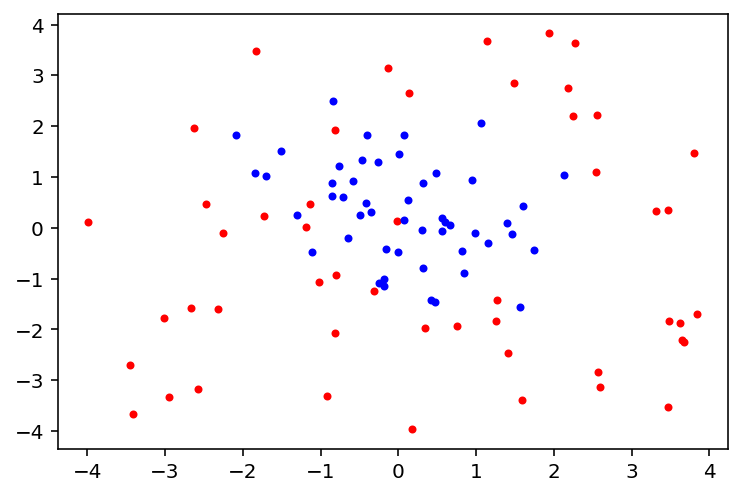

In [68]:
plt.plot(xs[0, ys==0], xs[1, ys==0], '.r')
plt.plot(xs[0, ys==1], xs[1, ys==1], '.b')

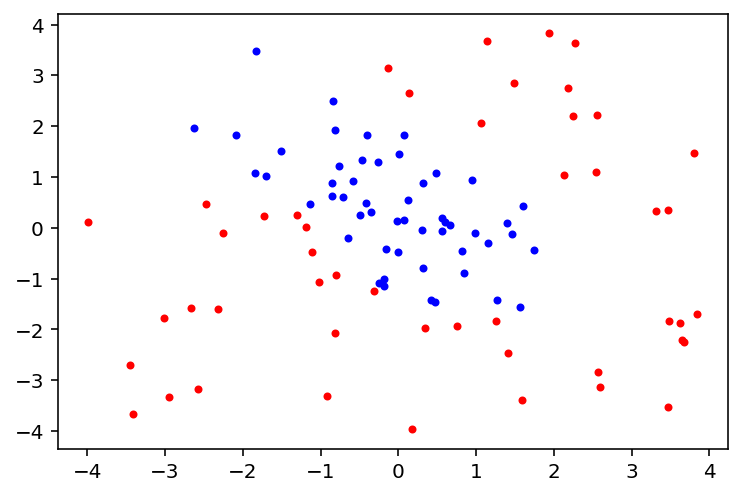

In [69]:
guess = s.classify(xs)[0]

plt.plot(xs[0, guess>0.5], xs[1, guess>0.5], '.b')
plt.plot(xs[0, guess<0.5], xs[1, guess<0.5], '.r')

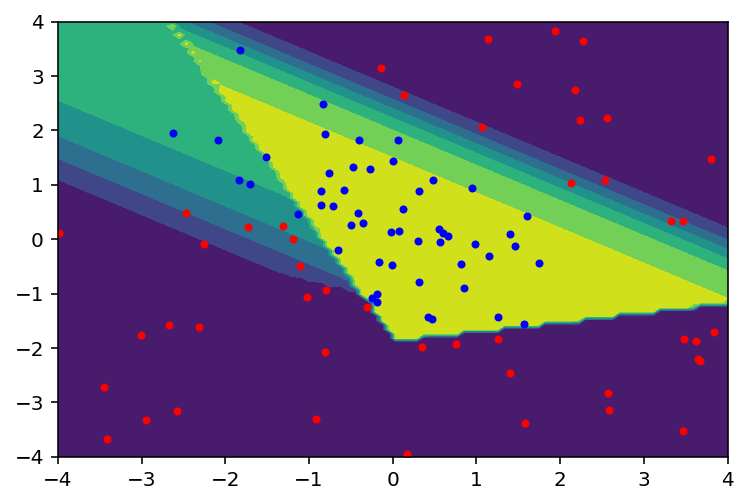

In [76]:
def contour(nn):
    xs = np.linspace(-4, 4, 100)
    ys = np.linspace(-4, 4, 100)
    mxs, mys = np.meshgrid(xs, ys)
    hxs = mxs.reshape(1, 100*100)
    hys = mys.reshape(1, 100*100)
    features = np.vstack([hxs, hys])
    hzs = nn.classify(features)
    mzs = hzs.reshape(100,100)
    plt.contourf(mxs, mys, mzs)
contour(s)
plt.plot(xs[0, guess>0.5], xs[1, guess>0.5], '.b')
plt.plot(xs[0, guess<0.5], xs[1, guess<0.5], '.r')

# Back Propagation

1) Why minimize is a bad idea?

2) Write down the update rule (The recursion relation one)

3) For the rest of the week. Write back propagation. This should work for any size neural network.

Shouldn't take that long though. You will spend most of the time on trying to understand the relation above.

Do this once and use library for the rest of your life unless you want something super custom.

In [18]:
class NeuralNetwork:
    def __init__(self, n_nodes):
        pass
    
    def train(self, xs, ys, lmbda):
        #back prop
        pass
    
    def classify(self, xs):
        pass